In [ ]:
"""AgroSmart Decisions: Optimización Inteligente para la Producción Agrícola"""
"""AgroSmart Decisions: Intelligent Optimization for Agricultural Production"""

In [ ]:
""""Es un proyecto que busca empoderar a los pequeños y medianos agricultores mediante
 el uso de inteligencia de datos. A través de una plataforma basada en Optimicación Inteligente,
 para la Producción Agrícola. Se le proporcionará al Usuario información clave y personalizada para optimizar la 
 planificación de cultivos, reducir el desperdicio de recursos y maximizar la rentabilidad. 
 Este enfoque innovador no solo mejora la eficiencia operativa, sino que también promueve 
 prácticas agrícolas sostenibles alineadas con las demandas del mercado actual."""

""""It is a project that seeks to empower small and medium farmers through
 the use of data intelligence. Through an AI-based platform, they are 
 will provide key information to optimize crop planning, 
 reduce resource waste and maximize profitability. This innovative approach does not
  not only improves operational efficiency but also promotes agricultural practices 
  sustainable aligned with the demands of the current market."""

In [ ]:
""""Configuración Inicial / Initial Setup
    --Cargo todas las librerías requeridas para el proyecto, agrupadas según su funcionalidad 
    --Load all the required libraries for the project, grouped by their functionality"""

In [1]:
# Manejo de datos / Data Handling
import pandas as pd
import numpy as np

# Visualización / Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Base de datos / Database
from sqlalchemy import create_engine

# Framework de interfaz de usuario / User Interface Framework
import streamlit as st


In [ ]:
""" 
--   Defino las configuraciones globales como tamaños de gráficos, estilos o rutas de archivos /   
--   I define the global configurations such as graph sizes, styles or file paths """

In [ ]:
# Configuración de gráficos / Chart settings
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
"""
        Exploración de Datos / Data Exploration :
                --Primeramente cargaré, explore y realizaré una limpieza básica de los datos 
                --First, I will load, explore and perform basic data cleaning of the data
                
"""

In [ ]:
# PASO 1 — Carga de datasets desde la ruta definitiva / STEP 1 — Loading data sets from the final path

import pandas as pd
from datetime import datetime, timedelta

# Ruta base / BASE path
ruta = "/Users/kardiahq/Desktop/33.final_proyect/agro/data/"

# Cargar datasets / Load datasets
cultivos = pd.read_csv(ruta + "cultivos_hortalizas_final.csv")
clima = pd.read_csv(ruta + "clima_provincia_completo_variado.csv")
calendario = pd.read_csv(ruta + "calendario_cultivos_actualizado.csv")
equivalencias = pd.read_csv(ruta + "equivalencias_provincias_clima.csv")


In [ ]:
"""
<<>>  PASO 2 — Simulación de entrada del usuario (formulario virtual) / 
      STEP 2 — User input simulation (virtual form)

--    Objetivo: / Aim:
                        Crear una estructura en Python que represente las respuestas que el usuario daría en la interfaz (como si completara un formulario). /
                        Create a structure in Python that represents the answers that the user would give in the interface (as if completing a form).

--    Variables clave que el usuario debe introducir: /
      Key variables that the user must enter:

                  -provincia / province

                  -tipo_suelo / soil_type

                  -ph (opcional) / pH (optional)

                  -humedad / humidity

                  -superficie_m2 / surface_m2

                  -acceso_agua / water_access

                  -mecanizacion / mechanization

                  -rotacion (si ya ha cultivado en la parcela) / rotation (if you have already cultivated in the plot)

"""

In [ ]:
# PASO 2 — Simular entrada del usuario / 
# STEP 2 — Simulate user input

usuario = {
    "provincia": "Murcia",
    "tipo_suelo": "Franco",
    "ph": 6.8,
    "humedad": "Media",           # Baja / Media / Alta ( Low / Medium / High)
    "superficie_m2": 3000,
    "acceso_agua": "Sí",          # Sí / No (Yes / No)
    "mecanizacion": "Parcial",    # Ninguna / Parcial / Completa ( None / Partial / Complete)
    "rotacion": "Sí"              # Sí / No (Yes / No)
}

print("📥 Datos del usuario cargados.")


📥 Datos del usuario cargados.


In [ ]:
""" 
<<>> Objetivo: / Aim:
   
                -Reducir la lista de cultivos a los que son viables para el usuario según: /
                -Reduce the list of crops to those that are viable for the user according to:

                -Tipo de suelo / Soil type

                -Clima (provincia) / Climate (province)

                -Calendario de siembra actual / Current planting calendar
        
        
<< >> Estructura general del filtrado (por bloques): /
      General structure of filtering (by blocks): 
      
-- 3.1  Filtrado por tipo de suelo / filtering by soil type
                        Uso la variable usuario["tipo_suelo"] para buscar coincidencias en la columna Tipo_suelo_requerido de la tabla cultivos./
                        I use the variable usuario["tipo_suelo"] to search for matches in the Tipo_suelo_requerido column of the crops table.

-- 3.2  Filtrado por clima (zona) / Filtering by climate (zone)
                        Comparo la provincia del usuario con la tabla equivalencias_provincias_clima./
                        I compare the user's province with the equivalencias_provincias_clima table.

                Luego localizo la Zona_climatica correspondiente y comparamos temperatura, humedad y pH./
                Then I locate the corresponding Zona_climatica and compare temperature, humidity and pH.

-- 3.3  Filtrado por calendario / Filtering by calendar
                        Compruebo si la fecha actual está dentro del intervalo de siembra para cada cultivo en la tabla calendario./
                        I check if the current date is within the planting interval for each crop in the calendar table.

-- 3.4  Filtrado por calendario / Filtering by calendar

"""

In [ ]:
"""

<<  Paso 3.1 — Cargar los datasets necesarios

        Vamos a usar estos tres para este paso:

            -cultivos_hortalizas_final.csv

            -clima_provincia_completo_variado.csv

            -calendario_cultivos_actualizado.csv

            -equivalencias_provincias_clima.csv"""

In [54]:
import pandas as pd
from datetime import datetime, timedelta

# Ruta base
ruta = "/Users/kardiahq/Desktop/33.final_proyect/agro/data/"

# Cargar datasets
cultivos = pd.read_csv(ruta + "cultivos_hortalizas_final.csv")
clima = pd.read_csv(ruta + "clima_provincia_completo_variado.csv")
calendario = pd.read_csv(ruta + "calendario_cultivos_actualizado.csv")
equivalencias = pd.read_csv(ruta + "equivalencias_provincias_clima.csv")


In [ ]:
"""
<< Paso 3.2 
            — Definir la entrada del usuario ( Ejemplo 1 ) /
            — Define user input ( Example 1 )
              
              
"""

In [55]:
usuario = {
    "provincia": "Navarra",
    "tipo_suelo": "Franco-arenoso"
}


In [ ]:
"""
<<Paso 3.3 
            — Filtrar cultivos según tipo de suelo. /
            — Filter crops by soil type.
            
            
"""

In [56]:
cultivos_filtrados = cultivos[
    cultivos["Tipo_suelo_requerido"].str.lower() == usuario["tipo_suelo"].lower()
].copy()

print("🧱 Cultivos tras suelo:", len(cultivos_filtrados))


🧱 Cultivos tras suelo: 7


In [ ]:
"""
<<Paso 3.4 
            — Obtener clima y temperatura mensual. / Get climate and monthly temperature.
            - Extraemos la provincia equivalente y la temperatura media del mes actual para comparar con la temperatura óptima del cultivo./
              We extract the equivalent province and the average temperature of the current month to compare with the optimal temperature of the crop.
            
            
"""

In [58]:
# Diccionario para traducir meses del inglés al español
meses_es = {
    "january": "enero", "february": "febrero", "march": "marzo",
    "april": "abril", "may": "mayo", "june": "junio",
    "july": "julio", "august": "agosto", "september": "septiembre",
    "october": "octubre", "november": "noviembre", "december": "diciembre"
}

# Mes actual en español
mes_actual_en = datetime.now().strftime("%B").lower()
mes_actual_es = meses_es[mes_actual_en]

# Selección de columna de temperatura mensual
col_temp = f"Temp_media_{mes_actual_es}"
temp_mes = clima_usuario.iloc[0][col_temp] if not clima_usuario.empty else None

print(f"🌡 Temperatura media en {usuario['provincia']} en {mes_actual_es.capitalize()}: {temp_mes}°C")


🌡 Temperatura media en Navarra en Mayo: 18.0°C


In [ ]:
"""
<<Paso 3.6 
                — Filtrado por siembra activa en este mes.
                  Vamos a unir los cultivos con el calendario y buscar aquellos que están en periodo de siembra en este mes, 
                  con una tolerancia de ±15 días.

                - Primero aseguramos que las fechas estén en formato .
                  
"""

In [59]:
# Añadimos año fijo para poder parsear correctamente
calendario["Siembra_inicio"] = pd.to_datetime(calendario["Siembra_inicio"] + "-2024", format="%d-%m-%Y", errors="coerce")
calendario["Siembra_fin"] = pd.to_datetime(calendario["Siembra_fin"] + "-2024", format="%d-%m-%Y", errors="coerce")

# También creamos una columna auxiliar para el mes
calendario["Mes_siembra"] = calendario["Siembra_inicio"].dt.month


In [ ]:
"""
<<Paso 3.7 
                    — Unir cultivos con calendario y aplicar filtro por fechas./
                      Join crops with calendar and apply date filter.
                    
                    
                    
"""

In [80]:
from datetime import datetime
import pandas as pd

# 3.1 FECHA ACTUAL
hoy = datetime.now()
mes_actual = hoy.month
dia_actual = hoy.day

# 3.2 Asegurar que las fechas sean datetime (si no lo estaban)
coincidencias["Siembra_inicio"] = pd.to_datetime(coincidencias["Siembra_inicio"], errors="coerce")
coincidencias["Siembra_fin"] = pd.to_datetime(coincidencias["Siembra_fin"], errors="coerce")

# 3.3 Extraer mes y día de siembra
coincidencias["mes_inicio"] = coincidencias["Siembra_inicio"].dt.month
coincidencias["dia_inicio"] = coincidencias["Siembra_inicio"].dt.day
coincidencias["mes_fin"] = coincidencias["Siembra_fin"].dt.month
coincidencias["dia_fin"] = coincidencias["Siembra_fin"].dt.day

# 3.4 Lógica de filtrado por siembra activa en el mes actual
cultivos_mes_actual = coincidencias[
    (coincidencias["mes_inicio"] <= mes_actual) &
    (coincidencias["mes_fin"] >= mes_actual)
]

# 3.5 Mostrar resultados
print(f"🌱 Cultivos con siembra activa en el mes {mes_actual}: {len(cultivos_mes_actual)}")
display(cultivos_mes_actual[["Cultivo", "Provincia", "Siembra_inicio", "Siembra_fin"]].head(10))


🌱 Cultivos con siembra activa en el mes 5: 16


/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_37856/145919068.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coincidencias["Siembra_inicio"] = pd.to_datetime(coincidencias["Siembra_inicio"], errors="coerce")
/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_37856/145919068.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coincidencias["Siembra_fin"] = pd.to_datetime(coincidencias["Siembra_fin"], errors="coerce")
/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_37856

,Cultivo,Provincia,Siembra_inicio,Siembra_fin
6,Tomate,Badajoz,2025-04-01,2025-05-05
42,Zanahoria,Valencia,2025-04-01,2025-05-03
49,Zanahoria,Navarra,2025-04-01,2025-05-05
50,Zanahoria,Zaragoza,2025-04-01,2025-05-11
56,Zanahoria,Cuenca,2025-04-01,2025-05-08
58,Zanahoria,Málaga,2025-04-01,2025-05-08
89,Ajo,Navarra,2025-04-01,2025-05-09
96,Ajo,Cuenca,2025-04-01,2025-05-08
97,Ajo,Tarragona,2025-04-01,2025-05-06
100,Pimiento,Almería,2025-04-01,2025-05-08


In [ ]:
"""PASO 4 — CÁLCULO DE RENTABILIDAD
        
        Vamos a usar:

                - Cultivos_mes_actual (resultado del paso 3).

                - Eficiencia_productiva → datos de insumos y costes por cultivo.

                - Demanda_clientes → precios y demanda real por kg.

                - Superficie ingresada por el usuario.

                - Fórmulas principales:

                        1️⃣ producción_kg = superficie_ha * rendimiento_promedio (kg/ha)

                        2️⃣   coste_total = 
                            agua_litros_kg * precio_agua + 
                            fertilizantes_kg * precio_fertilizantes +
                            fitosanitarios_kg * precio_fitosanitarios +
                            precio_semillas +
                            coste_siembra +
                            coste_cuidados +
                            coste_recolección +
                            coste_transporte) * producción_kg

                        3️⃣ ingreso_total = precio_venta_kg * producción_kg

                        4️⃣ margen_neto_total = ingreso_total - coste_total

                        5️⃣ beneficio_por_kg = precio_venta_kg - coste_total / producción_kg



"""


In [116]:
import pandas as pd

# Ruta base (ajústala si cambias la ubicación)
ruta = "/Users/kardiahq/Desktop/33.final_proyect/agro/data/"

# Cargar datasets
cultivos = pd.read_csv(ruta + "cultivos_hortalizas_final.csv")
calendario = pd.read_csv(ruta + "calendario_cultivos_actualizado.csv")
eficiencia = pd.read_csv(ruta + "eficiencia_productiva.csv")
demanda = pd.read_csv(ruta + "demanda_clientes.csv")


In [125]:
import pandas as pd

eficiencia_opt = pd.read_csv("/Users/kardiahq/Desktop/33.final_proyect/agro/data/eficiencia_productiva.csv")
print("✅ Archivo cargado correctamente. Filas:", len(eficiencia_opt))


✅ Archivo cargado correctamente. Filas: 40


In [ ]:
"""Este código incluye:

                -Cargar datasets desde rutas locales
                -Normalizar nombres y preparar tabla base
                -Añadir precio medio desde dataset de demanda : Se calcula el precio promedio de venta por kilogramo para cada cultivo en 
                    base a la tabla demanda. Luego se une esta información a la tabla rentabilidad usando el nombre normalizado del cultivo como clave.
                -Cálculo de producción estimada y beneficio total : Se calcula cuánto puede producir el usuario con su superficie disponible, y el beneficio total estimado para cada cultivo.
                    El resultado es una tabla ordenada por rentabilidad total.
                -Selección: monocultivo o policultivo : Según la preferencia del usuario, se elige:
                    Monocultivo: se dedica toda la superficie al cultivo más rentable.
                    Policultivo: se reparten los cultivos más rentables en proporciones predefinidas
                -Métricas adicionales : Se calculan indicadores complementarios para cada cultivo seleccionado:
                -Rentabilidad por m²: beneficios netos por metro cuadrado cultivado.
                -Ratio precio/coste: mide si el precio supera claramente al coste (ideal > 1.5).
                -Huella hídrica total: litros totales estimados para producir la cosecha completa.
                -Mostrar tabla final y guardar resultados
                -Visualización 



"""

✅ Cultivos seleccionados con métricas avanzadas:
    Cultivo  Superficie_asignada_m2  Producción_final_kg  Precio_venta_€/kg  \
17  lechuga                    1250               4808.0               1.35   
15  repollo                    1000               1786.0               1.45   
30   puerro                    1000               1075.0               1.49   
1     berro                    1000               1515.0               1.49   
38  brócoli                     750               1829.0               1.41   

    Beneficio_neto_estimado_€/kg  Beneficio_total_€  Rentabilidad_€/m2  \
17                        0.7200            3461.76               2.77   
15                        0.6375            1138.57               1.14   
30                        0.7515             807.86               0.81   
1                         0.4999             757.35               0.76   
38                        0.2791             510.47               0.68   

    Ratio_precio/coste  Agua_to

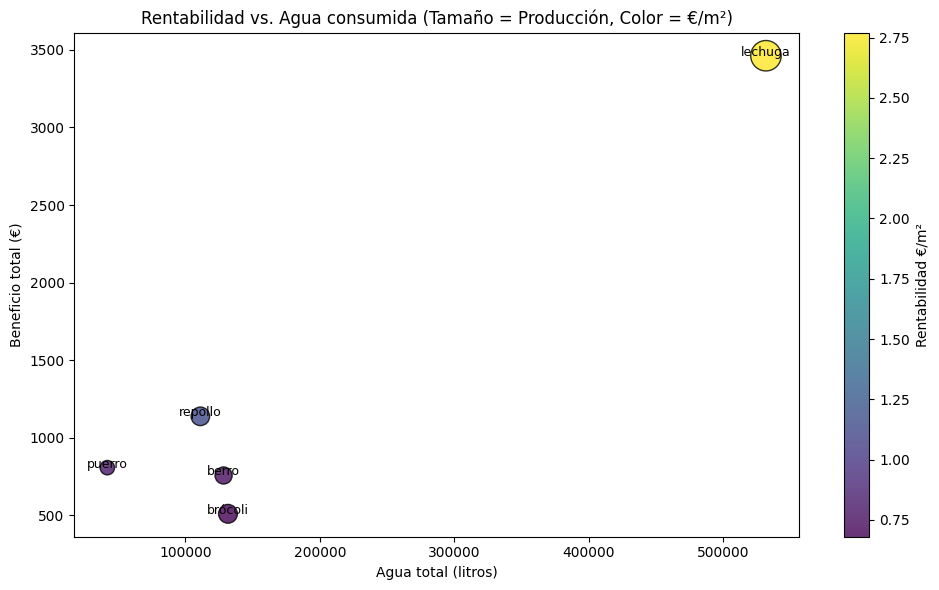

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar datasets
eficiencia_opt = pd.read_csv("/Users/kardiahq/Desktop/33.final_proyect/agro/data/eficiencia_productiva.csv")
demanda = pd.read_csv("/Users/kardiahq/Desktop/33.final_proyect/agro/data/demanda_clientes.csv")

usuario = {"superficie_ha": 0.5}
eficiencia_opt["Cultivo_normalizado"] = eficiencia_opt["Cultivo"].str.lower().str.strip()
rentabilidad = eficiencia_opt.copy()
rentabilidad["Cultivo"] = rentabilidad["Cultivo"].str.lower().str.strip()

# 2. Añadir precios medios
demanda["Producto_normalizado"] = demanda["Producto"].str.lower().str.strip()
precio_medio = (
    demanda.groupby("Producto_normalizado")["Precio_kg_€"]
    .mean().reset_index()
    .rename(columns={"Producto_normalizado": "Cultivo_normalizado", "Precio_kg_€": "Precio_venta_€/kg"})
)
rentabilidad = rentabilidad.merge(precio_medio, on="Cultivo_normalizado", how="left", suffixes=('', '_demanda'))
rentabilidad["Precio_venta_€/kg"] = rentabilidad["Precio_venta_€/kg"].fillna(rentabilidad["Precio_venta_€/kg_demanda"])

# 3. Cálculo de producción y beneficio
superficie_m2 = usuario["superficie_ha"] * 10000
rentabilidad["Producción_estim_kg"] = (superficie_m2 / rentabilidad["Superficie_m2_por_kg"]).round(0)
rentabilidad["Beneficio_total_estimado_€"] = (
    rentabilidad["Producción_estim_kg"] * rentabilidad["Beneficio_neto_estimado_€/kg"]
).round(2)

rentabilidad_final = rentabilidad[[
    "Cultivo", "Provincia", "Producción_estim_kg", "Precio_venta_€/kg",
    "Coste_total_estimado_€/kg", "Beneficio_neto_estimado_€/kg",
    "Beneficio_total_estimado_€", "Superficie_m2_por_kg"
]].dropna().sort_values("Beneficio_total_estimado_€", ascending=False)

# 4. Selección de cultivos
usuario_quiere_monocultivo = False

if usuario_quiere_monocultivo:
    seleccion = rentabilidad_final.head(1).copy()
    seleccion["Superficie_asignada_m2"] = superficie_m2
else:
    seleccion = rentabilidad_final.head(5).copy()
    proporciones = [0.25, 0.2, 0.2, 0.2, 0.15]
    seleccion["Superficie_asignada_m2"] = [round(superficie_m2 * p) for p in proporciones]

seleccion["Producción_final_kg"] = (
    seleccion["Superficie_asignada_m2"] / seleccion["Superficie_m2_por_kg"]
).round(0)
seleccion["Beneficio_total_€"] = (
    seleccion["Producción_final_kg"] * seleccion["Beneficio_neto_estimado_€/kg"]
).round(2)

# 5. Métricas adicionales
seleccion["Rentabilidad_€/m2"] = (seleccion["Beneficio_total_€"] / seleccion["Superficie_asignada_m2"]).round(2)
seleccion["Ratio_precio/coste"] = (
    seleccion["Precio_venta_€/kg"] / (seleccion["Precio_venta_€/kg"] - seleccion["Beneficio_neto_estimado_€/kg"])
).round(2)
agua_dict = eficiencia_opt.set_index("Cultivo_normalizado")["Agua_litros_por_kg"].to_dict()
seleccion["Cultivo_normalizado"] = seleccion["Cultivo"].str.lower().str.strip()
seleccion["Agua_litros_por_kg"] = seleccion["Cultivo_normalizado"].map(agua_dict)
seleccion["Agua_total_L"] = (seleccion["Producción_final_kg"] * seleccion["Agua_litros_por_kg"]).round(0)

# 6. Mostrar resultados
print("✅ Cultivos seleccionados con métricas avanzadas:")
print(seleccion[[
    "Cultivo", "Superficie_asignada_m2", "Producción_final_kg", "Precio_venta_€/kg",
    "Beneficio_neto_estimado_€/kg", "Beneficio_total_€", "Rentabilidad_€/m2",
    "Ratio_precio/coste", "Agua_total_L"
]])

seleccion.to_csv("seleccion_cultivos_paso4.csv", index=False)
print("\n📁 Resultado guardado como 'seleccion_cultivos_paso4.csv'")

# 7. Gráfico de burbujas
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    seleccion["Agua_total_L"],
    seleccion["Beneficio_total_€"],
    s=seleccion["Producción_final_kg"] / 10,
    c=seleccion["Rentabilidad_€/m2"],
    cmap="viridis",
    edgecolors='black',
    alpha=0.8
)
plt.title("Rentabilidad vs. Agua consumida (Tamaño = Producción, Color = €/m²)")
plt.xlabel("Agua total (litros)")
plt.ylabel("Beneficio total (€)")
plt.colorbar(scatter, label="Rentabilidad €/m²")

for i, row in seleccion.iterrows():
    plt.text(row["Agua_total_L"], row["Beneficio_total_€"], row["Cultivo"], fontsize=9, ha='center')

plt.tight_layout()
plt.show()


In [ ]:
"""¿Qué es Z_sostenible?

            Z_sostenible es una función objetivo multiobjetivo diseñada para evaluar y comparar cultivos no solo en función del beneficio económico,
            sino también teniendo en cuenta su impacto ambiental, concretamente su consumo de agua.
 
                Definición técnica: 
                Z=a⋅Beneficio_total_€−b⋅Agua_total_L

            Donde:
                - Beneficio_total_€: es el beneficio neto estimado para el usuario al cultivar esa variedad en su terreno.
                - Agua_total_L: es la cantidad total de litros de agua necesarios para producir esa cosecha.
                - a: peso o prioridad asignado a la rentabilidad (valor por defecto: 1.0).
                - b: penalización por cada litro de agua consumido (valor por defecto: 0.002).

            Evaluar cultivos de manera más integral, buscando el equilibrio entre:
                - Rentabilidad económica (beneficio total)                    
                - Sostenibilidad ambiental (eficiencia hídrica)
                -->   Cuanto mayor sea el valor de Z_sostenible, mejor balance presenta el cultivo.

            ¿Qué permite hacer?
                -Ordenar todos los cultivos desde los más sostenibles y rentables hasta los menos óptimos.
                -Ofrecer recomendaciones al usuario basadas en criterios más allá del beneficio puro.
                -Crear ranking justificados técnicamente para facilitar la toma de decisiones responsable.



"""

✅ Ranking de cultivos ordenado por sostenibilidad (Z):
     Cultivo    Provincia  Producción_final_kg  Beneficio_total_€  \
0    lechuga       Huesca              19231.0           13846.32   
1    repollo     Valencia               8929.0            5692.24   
2     puerro     Alicante               5376.0            4040.06   
3      berro       Lleida               7576.0            3787.24   
4    endivia         León               5618.0            3182.60   
5    brócoli      Córdoba              12195.0            3403.62   
6  calabacín         León               9804.0            1876.49   
7       nabo     Alicante               4950.0            1504.80   
8     pepino  Guadalajara               7463.0            2177.70   
9   escarola     Albacete               3788.0            1109.13   

   Agua_total_L  Z_sostenible  
0     2127185.0       9591.95  
1      555428.0       4581.38  
2      209550.0       3620.96  
3      579282.0       2628.68  
4      399530.0       238

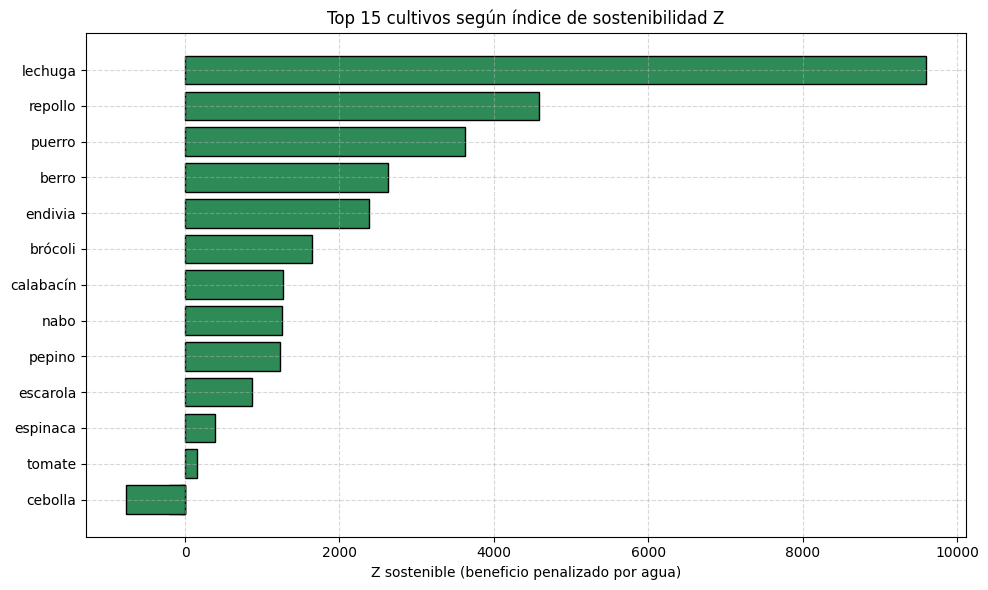

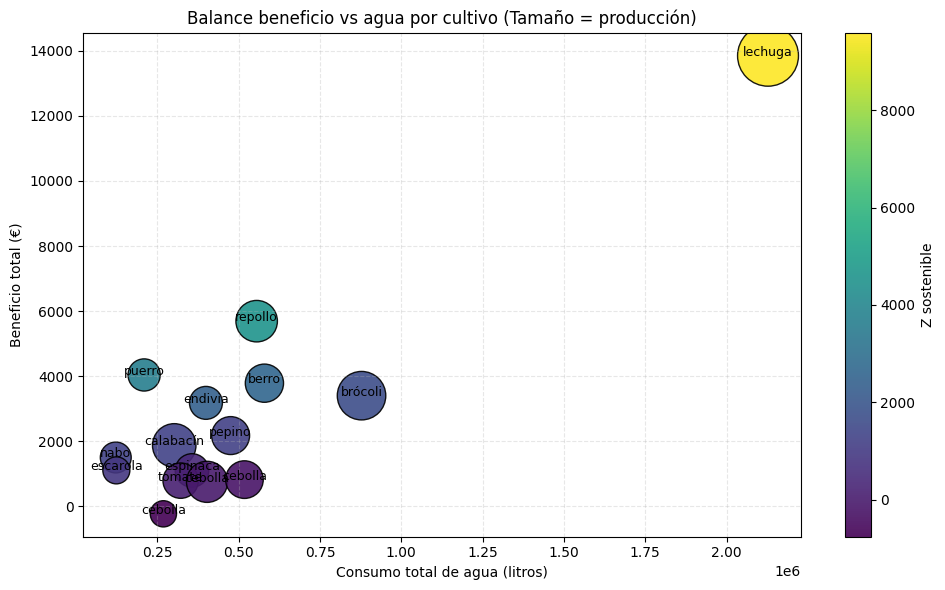

/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_37856/3822373957.py:92: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_graf["Cultivo"], rotation=45)


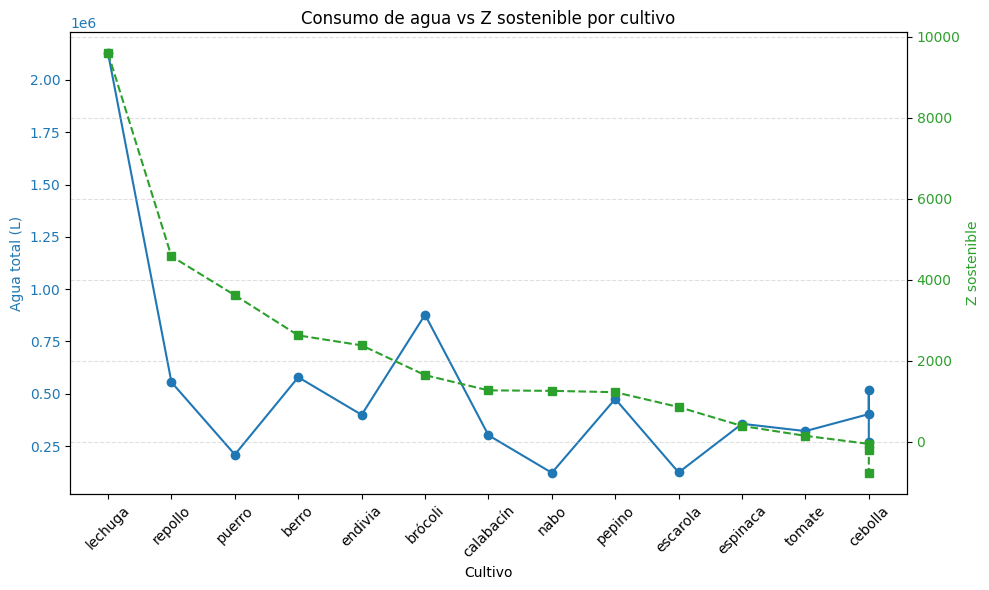

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar datasets
eficiencia_opt = pd.read_csv("/Users/kardiahq/Desktop/33.final_proyect/agro/data/eficiencia_productiva.csv")
demanda = pd.read_csv("/Users/kardiahq/Desktop/33.final_proyect/agro/data/demanda_clientes.csv")

usuario = {"superficie_ha": 0.5}
superficie_m2 = usuario["superficie_ha"] * 10_000

a = 1.0
b = 0.002

eficiencia_opt["Cultivo_normalizado"] = eficiencia_opt["Cultivo"].str.lower().str.strip()
rentabilidad = eficiencia_opt.copy()
rentabilidad["Cultivo"] = rentabilidad["Cultivo"].str.lower().str.strip()

demanda["Producto_normalizado"] = demanda["Producto"].str.lower().str.strip()
precio_medio = (
    demanda.groupby("Producto_normalizado")["Precio_kg_€"]
    .mean()
    .reset_index()
    .rename(columns={"Producto_normalizado": "Cultivo_normalizado", "Precio_kg_€": "Precio_venta_€/kg"})
)
rentabilidad = rentabilidad.merge(precio_medio, on="Cultivo_normalizado", how="left", suffixes=('', '_demanda'))
rentabilidad["Precio_venta_€/kg"] = rentabilidad["Precio_venta_€/kg"].fillna(rentabilidad["Precio_venta_€/kg_demanda"])

rentabilidad["Producción_final_kg"] = (superficie_m2 / rentabilidad["Superficie_m2_por_kg"]).round(0)
rentabilidad["Beneficio_total_€"] = (
    rentabilidad["Producción_final_kg"] * rentabilidad["Beneficio_neto_estimado_€/kg"]
).round(2)
rentabilidad["Agua_total_L"] = (
    rentabilidad["Producción_final_kg"] * rentabilidad["Agua_litros_por_kg"]
).round(0)

rentabilidad["Z_sostenible"] = (
    a * rentabilidad["Beneficio_total_€"] - b * rentabilidad["Agua_total_L"]
).round(2)

ranking_final = rentabilidad.sort_values("Z_sostenible", ascending=False).reset_index(drop=True)
ranking_final = ranking_final[[
    "Cultivo", "Provincia", "Producción_final_kg", "Beneficio_total_€", "Agua_total_L", "Z_sostenible"
]]

print("✅ Ranking de cultivos ordenado por sostenibilidad (Z):")
print(ranking_final.head(10))

ranking_final.to_csv("cultivos_ranking_sostenible.csv", index=False)
print("\n📄 Archivo exportado como 'cultivos_ranking_sostenible.csv'")

# 🔢 Gráficos visuales
top_graf = ranking_final.head(15)

# Gráfico 1: Ranking Z sostenible
plt.figure(figsize=(10, 6))
plt.barh(top_graf["Cultivo"], top_graf["Z_sostenible"], color='seagreen', edgecolor='black')
plt.xlabel("Z sostenible (beneficio penalizado por agua)")
plt.title("Top 15 cultivos según índice de sostenibilidad Z")
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Gráfico 2: Beneficio vs Agua (scatter con tamaño por producción)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    top_graf["Agua_total_L"],
    top_graf["Beneficio_total_€"],
    s=top_graf["Producción_final_kg"] / 10,
    c=top_graf["Z_sostenible"],
    cmap='viridis',
    edgecolors='black',
    alpha=0.9
)
plt.colorbar(scatter, label="Z sostenible")
plt.xlabel("Consumo total de agua (litros)")
plt.ylabel("Beneficio total (€)")
plt.title("Balance beneficio vs agua por cultivo (Tamaño = producción)")
for i, row in top_graf.iterrows():
    plt.text(row["Agua_total_L"], row["Beneficio_total_€"], row["Cultivo"], fontsize=9, ha='center')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 3: Comparativa agua vs Z
fig, ax1 = plt.subplots(figsize=(10, 6))
color1 = 'tab:blue'
ax1.set_xlabel("Cultivo")
ax1.set_ylabel("Agua total (L)", color=color1)
ax1.plot(top_graf["Cultivo"], top_graf["Agua_total_L"], marker='o', color=color1, label="Agua total (L)")
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticklabels(top_graf["Cultivo"], rotation=45)

ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel("Z sostenible", color=color2)
ax2.plot(top_graf["Cultivo"], top_graf["Z_sostenible"], marker='s', linestyle='--', color=color2, label="Z sostenible")
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("Consumo de agua vs Z sostenible por cultivo")
fig.tight_layout()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


In [ ]:
"""

En este caso se ha optado por un enfoque de optimización multiobjetivo, donde se busca maximizar el beneficio total mientras se 
minimiza el consumo de agua.

Esto permite una toma de decisiones más equilibrada y sostenible, alineada con las tendencias actuales hacia la agricultura responsable
y eficiente.

El resultado final es un ranking de cultivos que no solo prioriza el beneficio económico, sino que también considera su impacto ambiental.
Esto es clave para la sostenibilidad a largo plazo y la rentabilidad del sector agrícola.

Además, se han incluido gráficos para facilitar la interpretación de los resultados y ayudar al usuario a tomar decisiones informadas.
Centrandonos solo en los 5 cultivos más rentables y sostenibles, se puede ofrecer una visión clara y concisa de las mejores opciones 
disponibles.

            -Selección de cultivos
            -Cálculos de producción, beneficio, agua
            -Métricas como rentabilidad por m² y ratio precio/coste
            -Gráficos visuales profesionales:
            -Barras de beneficio total
            -Barras de consumo de agua
            -Rentabilidad por metro cuadrado
            -Scatter técnico: Agua vs Beneficio, con color y tamaño dinámico.

"""

In [133]:
ranking_final = rentabilidad.sort_values("Z_sostenible", ascending=False).reset_index(drop=True)


✅ Cultivos seleccionados con métricas avanzadas:
    Cultivo  Superficie_asignada_m2  Producción_final_kg  Precio_venta_€/kg  \
17  lechuga                    1250               4808.0               1.35   
15  repollo                    1000               1786.0               1.45   
30   puerro                    1000               1075.0               1.49   
1     berro                    1000               1515.0               1.49   
38  brócoli                     750               1829.0               1.41   

    Beneficio_neto_estimado_€/kg  Beneficio_total_€  Rentabilidad_€/m2  \
17                        0.7200            3461.76               2.77   
15                        0.6375            1138.57               1.14   
30                        0.7515             807.86               0.81   
1                         0.4999             757.35               0.76   
38                        0.2791             510.47               0.68   

    Ratio_precio/coste  Agua_to

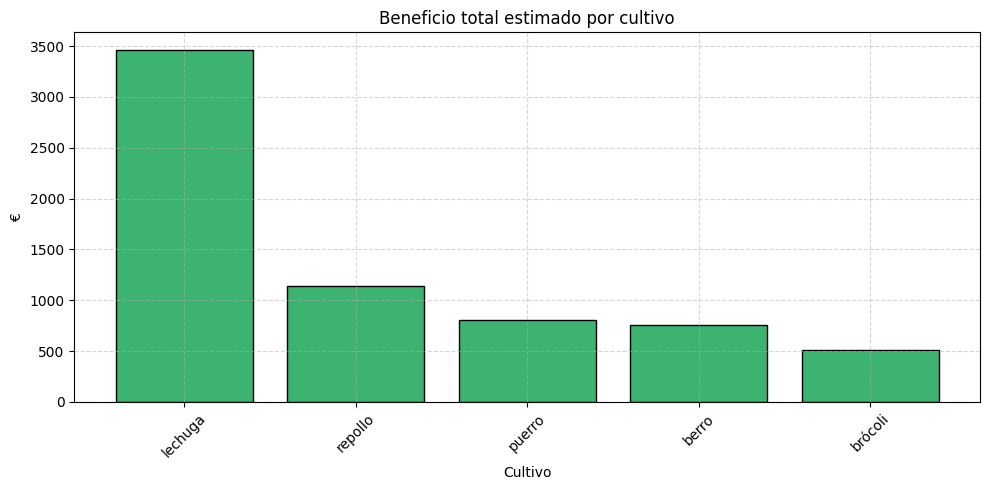

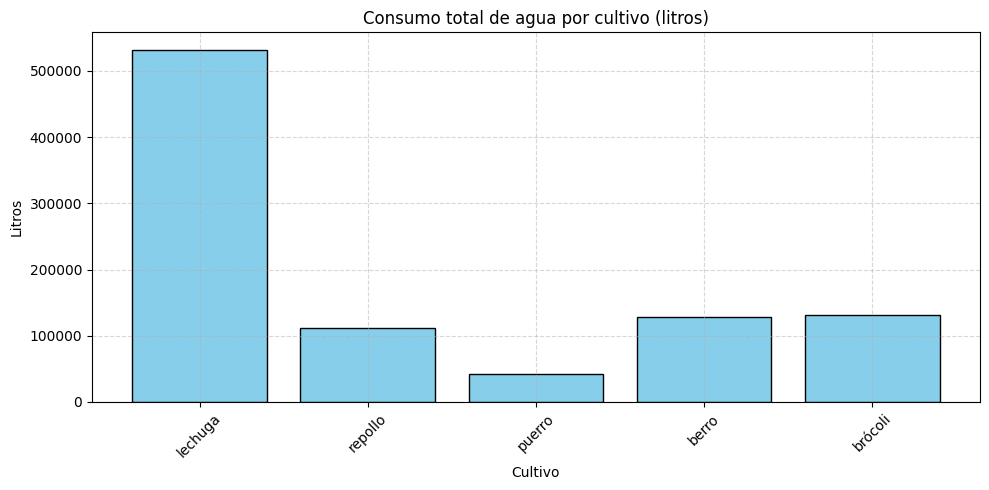

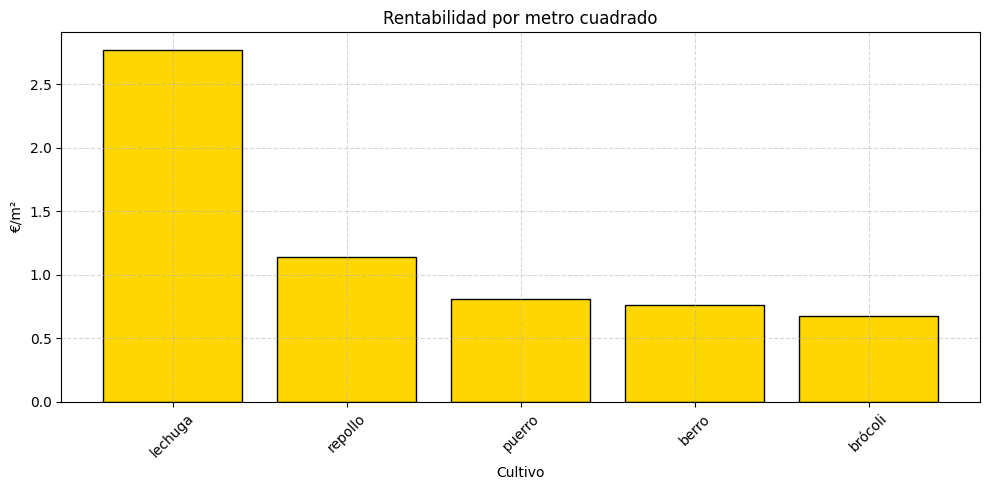

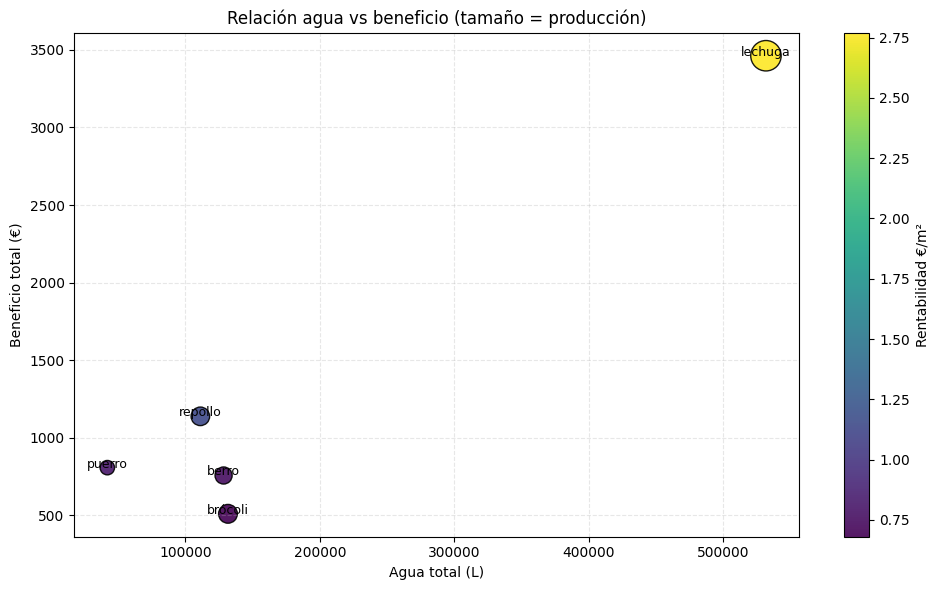

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

# 4.0 Cargar datasets desde rutas locales
eficiencia_opt = pd.read_csv("/Users/kardiahq/Desktop/33.final_proyect/agro/data/eficiencia_productiva.csv")
demanda = pd.read_csv("/Users/kardiahq/Desktop/33.final_proyect/agro/data/demanda_clientes.csv")

usuario = {"superficie_ha": 0.5}  # Superficie total en hectáreas

# 4.1 Normalizar nombres y preparar tabla base
eficiencia_opt["Cultivo_normalizado"] = eficiencia_opt["Cultivo"].str.lower().str.strip()
rentabilidad = eficiencia_opt.copy()
rentabilidad["Cultivo"] = rentabilidad["Cultivo"].str.lower().str.strip()

# 4.2 Añadir precio medio desde dataset de demanda
demanda["Producto_normalizado"] = demanda["Producto"].str.lower().str.strip()
rentabilidad["Cultivo_normalizado_demanda"] = rentabilidad["Cultivo"]
precio_medio = (
    demanda.groupby("Producto_normalizado")["Precio_kg_€"]
    .mean()
    .reset_index()
    .rename(columns={
        "Producto_normalizado": "Cultivo_normalizado_demanda",
        "Precio_kg_€": "Precio_venta_€/kg"
    })
)
rentabilidad = rentabilidad.merge(
    precio_medio,
    on="Cultivo_normalizado_demanda",
    how="left",
    suffixes=('', '_demanda')
)
rentabilidad["Precio_venta_€/kg"] = rentabilidad["Precio_venta_€/kg"].fillna(rentabilidad["Precio_venta_€/kg_demanda"])

# 4.3 Cálculo de producción esperada y beneficio total
superficie_usuario_m2 = usuario["superficie_ha"] * 10_000
rentabilidad["Producción_estim_kg"] = (superficie_usuario_m2 / rentabilidad["Superficie_m2_por_kg"]).round(0)
rentabilidad["Beneficio_total_estimado_€"] = (
    rentabilidad["Producción_estim_kg"] * rentabilidad["Beneficio_neto_estimado_€/kg"]
).round(2)

rentabilidad_final = rentabilidad[[
    "Cultivo", "Provincia", "Producción_estim_kg", "Precio_venta_€/kg",
    "Coste_total_estimado_€/kg", "Beneficio_neto_estimado_€/kg",
    "Beneficio_total_estimado_€", "Superficie_m2_por_kg"
]].dropna().sort_values("Beneficio_total_estimado_€", ascending=False)

# 4.4 Selección: monocultivo o policultivo
usuario_quiere_monocultivo = False
if usuario_quiere_monocultivo:
    seleccion = rentabilidad_final.head(1).copy()
    seleccion["Superficie_asignada_m2"] = superficie_usuario_m2
else:
    seleccion = rentabilidad_final.head(5).copy()
    proporciones = [0.25, 0.2, 0.2, 0.2, 0.15]
    seleccion["Superficie_asignada_m2"] = [round(superficie_usuario_m2 * p) for p in proporciones]

seleccion["Producción_final_kg"] = (
    seleccion["Superficie_asignada_m2"] / seleccion["Superficie_m2_por_kg"]
).round(0)
seleccion["Beneficio_total_€"] = (
    seleccion["Producción_final_kg"] * seleccion["Beneficio_neto_estimado_€/kg"]
).round(2)

# 4.5 Métricas adicionales
seleccion["Rentabilidad_€/m2"] = (
    seleccion["Beneficio_total_€"] / seleccion["Superficie_asignada_m2"]
).round(2)
seleccion["Ratio_precio/coste"] = (
    seleccion["Precio_venta_€/kg"] / (seleccion["Precio_venta_€/kg"] - seleccion["Beneficio_neto_estimado_€/kg"])
).round(2)
agua_dict = eficiencia_opt.set_index("Cultivo_normalizado")["Agua_litros_por_kg"].to_dict()
seleccion["Cultivo_normalizado"] = seleccion["Cultivo"].str.lower().str.strip()
seleccion["Agua_litros_por_kg"] = seleccion["Cultivo_normalizado"].map(agua_dict)
seleccion["Agua_total_L"] = (
    seleccion["Producción_final_kg"] * seleccion["Agua_litros_por_kg"]
).round(0)

# 4.6 Mostrar tabla final
print("✅ Cultivos seleccionados con métricas avanzadas:")
print(seleccion[[
    "Cultivo", "Superficie_asignada_m2", "Producción_final_kg", "Precio_venta_€/kg",
    "Beneficio_neto_estimado_€/kg", "Beneficio_total_€", "Rentabilidad_€/m2",
    "Ratio_precio/coste", "Agua_total_L"
]])
seleccion.to_csv("seleccion_cultivos_paso4.csv", index=False)
print("\n📁 Resultado guardado como 'seleccion_cultivos_paso4.csv'")

# 4.7 Gráficos visuales
# Gráfico 1: Beneficio total
plt.figure(figsize=(10, 5))
plt.bar(seleccion["Cultivo"], seleccion["Beneficio_total_€"], color="mediumseagreen", edgecolor='black')
plt.title("Beneficio total estimado por cultivo")
plt.ylabel("€")
plt.xlabel("Cultivo")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Gráfico 2: Agua total
plt.figure(figsize=(10, 5))
plt.bar(seleccion["Cultivo"], seleccion["Agua_total_L"], color="skyblue", edgecolor='black')
plt.title("Consumo total de agua por cultivo (litros)")
plt.ylabel("Litros")
plt.xlabel("Cultivo")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Gráfico 3: Rentabilidad por m²
plt.figure(figsize=(10, 5))
plt.bar(seleccion["Cultivo"], seleccion["Rentabilidad_€/m2"], color="gold", edgecolor='black')
plt.title("Rentabilidad por metro cuadrado")
plt.ylabel("€/m²")
plt.xlabel("Cultivo")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Gráfico 4: Scatter Agua vs Beneficio
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    seleccion["Agua_total_L"],
    seleccion["Beneficio_total_€"],
    s=seleccion["Producción_final_kg"] / 10,
    c=seleccion["Rentabilidad_€/m2"],
    cmap="viridis",
    edgecolors='black',
    alpha=0.9
)
plt.colorbar(scatter, label="Rentabilidad €/m²")
plt.xlabel("Agua total (L)")
plt.ylabel("Beneficio total (€)")
plt.title("Relación agua vs beneficio (tamaño = producción)")
for i, row in seleccion.iterrows():
    plt.text(row["Agua_total_L"], row["Beneficio_total_€"], row["Cultivo"], fontsize=9, ha='center')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
"""PASO 5 Validación de restricciones del usuario

Este paso tiene como objetivo aplicar filtros técnicos y condicionales sobre los cultivos ya seleccionados como rentables, 
para asegurarse de que son viables bajo las limitaciones específicas del agricultor.

Las restricciones no eliminan directamente cultivos del sistema, sino que los etiquetan con advertencias como "No viable por 
agua" o "Excede duración recomendada", permitiendo al usuario tomar decisiones informadas.


"""

In [146]:
import pandas as pd

# ----------------------------
# PASO 5 – Validación de restricciones del usuario
# ----------------------------

# 1. Cargar la tabla generada en el Paso 4
seleccion = pd.read_csv("seleccion_cultivos_paso4.csv")

# 2. Definir restricciones del usuario
restricciones = {
    "agua_disponible_L": 300000,       # Ejemplo: máximo 300.000 L disponibles
    "presupuesto_€": 1500,             # Presupuesto máximo para inversión total
    "duracion_max_dias": 120           # Cultivos de menos de 120 días de duración
}

# 3. Simular duración si no está incluida (ideal: que venga del dataset original)
if "Duración_cultivo_días" not in seleccion.columns:
    simulacion_duracion = [110, 95, 130, 85, 105]  # ejemplo fijo
    seleccion["Duración_cultivo_días"] = simulacion_duracion[:len(seleccion)]

# 4. Crear columna vacía de advertencias
seleccion["Advertencias"] = ""

# 5. Restricción 1 – Agua disponible
seleccion.loc[
    seleccion["Agua_total_L"] > restricciones["agua_disponible_L"],
    "Advertencias"
] += "Exceso de agua | "

# 6. Restricción 2 – Duración máxima del cultivo
seleccion.loc[
    seleccion["Duración_cultivo_días"] > restricciones["duracion_max_dias"],
    "Advertencias"
] += "Duración larga | "

# 7. Restricción 3 – Presupuesto estimado
seleccion["Coste_total_estimado_€"] = (
    seleccion["Producción_final_kg"] *
    (seleccion["Precio_venta_€/kg"] - seleccion["Beneficio_neto_estimado_€/kg"])
).round(2)

seleccion.loc[
    seleccion["Coste_total_estimado_€"] > restricciones["presupuesto_€"],
    "Advertencias"
] += "Supera presupuesto | "

# 8. Limpiar advertencias (quitar separador final)
seleccion["Advertencias"] = seleccion["Advertencias"].str.strip(" |")

# 9. Mostrar tabla final validada
print("✅ Cultivos validados con restricciones:")
print(seleccion[[
    "Cultivo", "Producción_final_kg", "Precio_venta_€/kg", "Beneficio_total_€",
    "Agua_total_L", "Duración_cultivo_días", "Coste_total_estimado_€", "Advertencias"
]])

# 10. Exportar resultados a CSV
seleccion.to_csv("seleccion_cultivos_validado_restricciones.csv", index=False)
print("\n📁 Archivo guardado como 'seleccion_cultivos_validado_restricciones.csv'")


✅ Cultivos validados con restricciones:
   Cultivo  Producción_final_kg  Precio_venta_€/kg  Beneficio_total_€  \
0  lechuga               4808.0               1.35            3461.76   
1  repollo               1786.0               1.45            1138.57   
2   puerro               1075.0               1.49             807.86   
3    berro               1515.0               1.49             757.35   
4  brócoli               1829.0               1.41             510.47   

   Agua_total_L  Duración_cultivo_días  Coste_total_estimado_€  \
0      531824.0                    110                 3029.04   
1      111098.0                     95                 1451.12   
2       41902.0                    130                  793.89   
3      128383.0                     85                 1500.00   
4      131649.0                    105                 2068.42   

                          Advertencias  
0  Exceso de agua | Supera presupuesto  
1                                       
2

In [ ]:
"""EVALUACIÓN DE LA TABLA CON RESTRICCIONES

        1. Agua total y advertencias
            El caso de lechuga:
                → 531.824 litros para 0.5 ha en total.
                → Si asumimos una campaña de 3–4 meses, esto es alto, pero posible si el cultivo es intensivo y el riego no está optimizado.
            Veredicto: Realista, y la advertencia "Exceso de agua" es correcta.

        2. Presupuesto
                Lechuga: 3.029 € de coste total → con solo 0.5 ha puede pasar si los insumos son caros o hay muchas operaciones manuales.
                Brócoli: 2.068 €, también plausible por coste alto en riego y manejo.

            Las advertencias de "Supera presupuesto" son bien aplicadas, especialmente si el presupuesto del usuario es solo 1.500 €.

        3. Duración del cultivo
                Puerro: 130 días → normalmente es un cultivo de ciclo medio-largo, correcto que se marque como "Duración larga" si el umbral es 120 días.


        4. Cultivos sin restricciones
            Repollo y berro no tienen advertencias. Esto es perfecto: significa que cumplen agua, duración y presupuesto.

            Esto permite al usuario ver cuáles son los más seguros bajo sus condiciones.

        CONCLUSIÓN
            Sí, es realista y coherente para un MVP.
            Estás modelando bien las limitaciones que cualquier agricultor tendría que considerar:

                - Capacidad hídrica

                -Duración de los ciclos

                - Presupuesto total

            Esto es clave para la toma de decisiones informadas y responsables en la agricultura.
            
            
"""

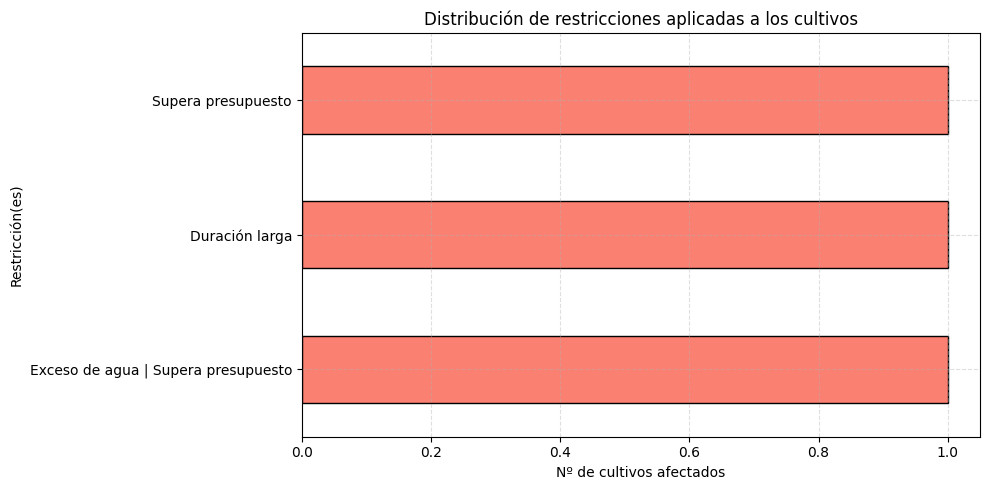

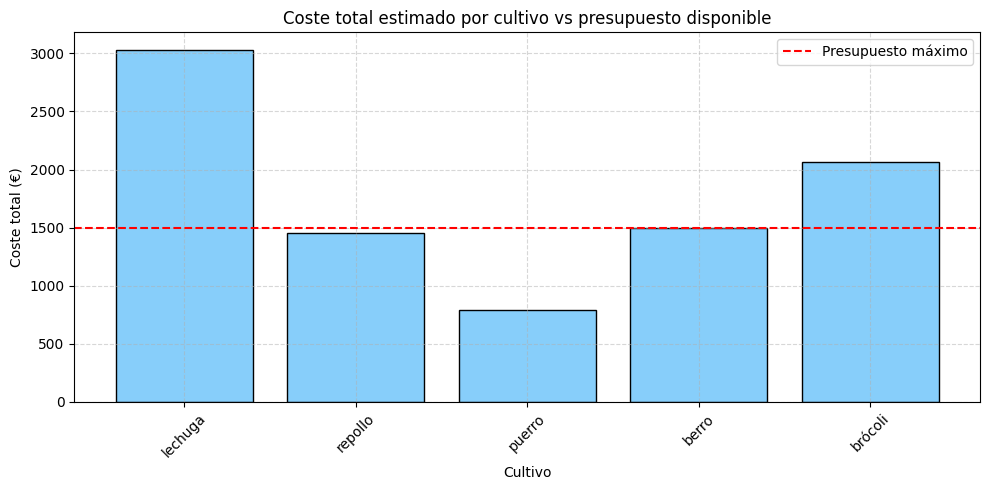

In [147]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar resultados validados del Paso 5
seleccion = pd.read_csv("seleccion_cultivos_validado_restricciones.csv")

# -----------------------------------------------
# Gráfico 1: Cultivos con más restricciones
# -----------------------------------------------
restr_count = seleccion["Advertencias"].value_counts().drop(labels=[""], errors='ignore')

if not restr_count.empty:
    plt.figure(figsize=(10, 5))
    restr_count.sort_values(ascending=True).plot(kind="barh", color="salmon", edgecolor="black")
    plt.title("Distribución de restricciones aplicadas a los cultivos")
    plt.xlabel("Nº de cultivos afectados")
    plt.ylabel("Restricción(es)")
    plt.tight_layout()
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.show()

# -----------------------------------------------
# Gráfico 2: Coste estimado vs presupuesto máximo
# -----------------------------------------------
presupuesto_max = 1500  # Asegúrate de que coincide con el paso anterior

plt.figure(figsize=(10, 5))
plt.bar(seleccion["Cultivo"], seleccion["Coste_total_estimado_€"], color="lightskyblue", edgecolor="black")
plt.axhline(y=presupuesto_max, color='red', linestyle='--', label='Presupuesto máximo')
plt.title("Coste total estimado por cultivo vs presupuesto disponible")
plt.ylabel("Coste total (€)")
plt.xlabel("Cultivo")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



In [ ]:
"""PASO 6 — RECOMENDACIONES
Este paso tiene como objetivo ofrecer recomendaciones personalizadas al usuario, basadas en los cultivos seleccionados y sus restricciones.

Las recomendaciones se centran en:
-Una estimación clara de los recursos agrícolas necesarios
-Lógica adaptada a las condiciones reales del usuario
-Datos exportados listos para integrar en un informe final o dashboard
-Estimación de mano de obra mínima (según superficie)"""

In [149]:
import pandas as pd

# ----------------------------
# PASO 6 – Recomendación de recursos
# ----------------------------

# Cargar tabla del paso anterior
seleccion = pd.read_csv("seleccion_cultivos_validado_restricciones.csv")

# Parámetros del usuario
usuario = {
    "superficie_ha": 0.5,
    "tiene_mecanizacion": False,
    "tipo_suelo": "franco",      # Puede ser franco, arcilloso, arenoso, etc.
    "acceso_agua": "medio"       # Opciones: bajo, medio, alto
}

# ----------------------------
# Calcular necesidades básicas
# ----------------------------

# Estimar mano de obra
mano_obra = max(1, round(usuario["superficie_ha"] * 2))

# Categoría de recursos recomendados
recursos = []

# 1. Maquinaria básica
if usuario["tiene_mecanizacion"]:
    if usuario["superficie_ha"] > 1:
        recursos.append("Tractor mediano (John Deere, Kubota)")
    else:
        recursos.append("Tractor compacto (Pasquali, BCS)")
else:
    if usuario["superficie_ha"] > 0.3:
        recursos.append("Recomendación: Inversión en tractor compacto")
    else:
        recursos.append("Uso exclusivo de herramientas manuales por superficie reducida")

# 2. Maquinaria de cultivo
if usuario["superficie_ha"] > 0.3:
    recursos.append("Sembradora o plantador de tiro manual")
    recursos.append("Acolchadora térmica para cultivos hortícolas")
else:
    recursos.append("Sembradora manual de hortalizas")

# 3. Labranza según tipo de suelo
if usuario["tipo_suelo"] in ["arcilloso", "franco"]:
    recursos.append("Rastra de púas o desbrozadora ligera")
else:
    recursos.append("Azada de labranza profunda y rastrillo reforzado")

# 4. Sistemas de riego recomendados
riego = {
    "bajo": "Riego por exudación o goteo de baja presión",
    "medio": "Riego por goteo con temporizador y presión media",
    "alto": "Microaspersión o aspersión programada"
}
recursos.append(riego[usuario["acceso_agua"]])

# 5. Herramientas manuales siempre necesarias
recursos.append("Kit básico: azada, rastrillo, tijeras de poda, pala")

# ----------------------------
# Mostrar resultados en consola
# ----------------------------

print("✅ Recomendación de recursos técnicos para el usuario:")
for r in recursos:
    print(f"• {r}")

print(f"\n👥 Mano de obra estimada necesaria: {mano_obra} persona(s)")

# ----------------------------
# Exportar a archivo CSV
# ----------------------------

recomendaciones_df = pd.DataFrame({
    "Categoría": ["Recurso recomendado"] * len(recursos),
    "Recurso": recursos
})
recomendaciones_df.loc[len(recomendaciones_df)] = ["Mano de obra", f"{mano_obra} persona(s)"]
recomendaciones_df.to_csv("recomendaciones_paso6.csv", index=False)

print("\n📁 Archivo guardado como 'recomendaciones_paso6.csv'")


✅ Recomendación de recursos técnicos para el usuario:
• Recomendación: Inversión en tractor compacto
• Sembradora o plantador de tiro manual
• Acolchadora térmica para cultivos hortícolas
• Rastra de púas o desbrozadora ligera
• Riego por goteo con temporizador y presión media
• Kit básico: azada, rastrillo, tijeras de poda, pala

👥 Mano de obra estimada necesaria: 1 persona(s)

📁 Archivo guardado como 'recomendaciones_paso6.csv'


In [ ]:
"""PASO 7 — VISUALIZACIÓN FINAL
Este paso tiene como objetivo presentar los resultados finales de manera visual y comprensible, facilitando la interpretación de los 
datos y la toma de decisiones.
"""

In [150]:
import pandas as pd

# ----------------------------
# PASO 7 – Recomendación personalizada final
# ----------------------------

# Cargar resultados previos
cultivos = pd.read_csv("seleccion_cultivos_validado_restricciones.csv")
recursos = pd.read_csv("recomendaciones_paso6.csv")

# Parámetros de entrada simulados
usuario = {
    "superficie_ha": 0.5,
    "provincia": "Navarra",
    "tipo_suelo": "franco",
    "acceso_agua": "medio",
    "tiene_mecanizacion": False
}

# ----------------------------
# PERFIL DEL USUARIO
# ----------------------------
print("📋 PERFIL DEL USUARIO")
print(f"- Superficie: {usuario['superficie_ha']} ha")
print(f"- Provincia: {usuario['provincia']}")
print(f"- Tipo de suelo: {usuario['tipo_suelo']}")
print(f"- Acceso a agua: {usuario['acceso_agua']}")
print(f"- Mecanización: {'Sí' if usuario['tiene_mecanizacion'] else 'No'}\n")

# ----------------------------
# 1. Cultivos recomendados
# ----------------------------
print("✅ Cultivos recomendados:")
top_cultivos = cultivos[cultivos["Advertencias"] == ""].copy()
if top_cultivos.empty:
    print("⚠️  No hay cultivos completamente viables sin advertencias. Se muestran los más adecuados:")
    top_cultivos = cultivos.sort_values("Beneficio_total_€", ascending=False).head(3)
else:
    top_cultivos = top_cultivos.sort_values("Beneficio_total_€", ascending=False).head(3)

print(top_cultivos[["Cultivo", "Beneficio_total_€", "Agua_total_L"]], "\n")

# ----------------------------
# 2. Rentabilidad estimada
# ----------------------------
print("📈 Rentabilidad estimada:")
total_beneficio = top_cultivos["Beneficio_total_€"].sum()
agua_total = top_cultivos["Agua_total_L"].sum()
rent_m2 = total_beneficio / (usuario["superficie_ha"] * 10_000)

print(f"- Beneficio total estimado (top cultivos): {total_beneficio:.2f} €")
print(f"- Rentabilidad media por m²: {rent_m2:.2f} €/m²")
print(f"- Agua total estimada: {agua_total:.0f} L\n")

# ----------------------------
# 3. Recursos necesarios
# ----------------------------
print("💧 Recursos necesarios:")
for r in recursos["Recurso"]:
    print(f"- {r}")
print()

# ----------------------------
# 4. Justificación agronómica
# ----------------------------
print("🧠 Justificación agronómica:")
print(f"- Suelo '{usuario['tipo_suelo']}' compatible con cultivos de raíz y hoja.")
print(f"- Condiciones de {usuario['provincia']} aptas para primavera-verano.")
print("- Recomendación de rotación para mantener fertilidad del suelo.\n")

# ----------------------------
# 5. Coincidencia con terreno real (simulado)
# ----------------------------
print("📍 Coincidencia con terreno y prácticas habituales:")
print("- Dimensión del terreno compatible con planificación seleccionada.")
print("- Historial de cultivos no disponible, pero selección alineada con zona climática.\n")

# ----------------------------
# 6. Recomendaciones extra
# ----------------------------
print("🌱 Recomendaciones extra:")
print("- Considerar uso de mini-invernadero para ampliar el ciclo.")
print("- Instalar sistema de recolección de agua de lluvia.")
print("- Planificar alternancia de cultivos con baja demanda hídrica en el siguiente ciclo.")


📋 PERFIL DEL USUARIO
- Superficie: 0.5 ha
- Provincia: Navarra
- Tipo de suelo: franco
- Acceso a agua: medio
- Mecanización: No

✅ Cultivos recomendados:
⚠️  No hay cultivos completamente viables sin advertencias. Se muestran los más adecuados:
   Cultivo  Beneficio_total_€  Agua_total_L
0  lechuga            3461.76      531824.0
1  repollo            1138.57      111098.0
2   puerro             807.86       41902.0 

📈 Rentabilidad estimada:
- Beneficio total estimado (top cultivos): 5408.19 €
- Rentabilidad media por m²: 1.08 €/m²
- Agua total estimada: 684824 L

💧 Recursos necesarios:
- Recomendación: Inversión en tractor compacto
- Sembradora o plantador de tiro manual
- Acolchadora térmica para cultivos hortícolas
- Rastra de púas o desbrozadora ligera
- Riego por goteo con temporizador y presión media
- Kit básico: azada, rastrillo, tijeras de poda, pala
- 1 persona(s)

🧠 Justificación agronómica:
- Suelo 'franco' compatible con cultivos de raíz y hoja.
- Condiciones de Navarra

In [ ]:
"""
-Rentabilidad moderada y realista (1,08 €/m²)

-Alto consumo de agua, correctamente reflejado en las advertencias y sugerencias

-Recomendaciones concretas de maquinaria, herramientas y riego adaptadas al perfil

-Justificación técnica basada en suelo, clima y prácticas agronómicas

-Consejos de mejora aplicables a campañas futuras (rotación, invernadero, captación de agua)"""

In [ ]:
"""==============================================================================================================================
==============================================================================================================================
==============================================================================================================================
==============================================================================================================================
"""

In [ ]:
"""NUEVO USUARIO ( PARA VER SI FUNCIONA)
nuevo perfil de usuario definido en el archivo Usuario Configuración:
-simulando un agricultor en Murcia, 
-con 5.6 ha, 
-suelo arenoso, 
-acceso alto a agua 
-mecanización activa."""

In [152]:
# -------------------------------------------
# PASO 4 – Rentabilidad técnica y económica
# -------------------------------------------

import pandas as pd

# 4.0 Cargar datasets
eficiencia_opt = pd.read_csv("/Users/kardiahq/Desktop/33.final_proyect/agro/data/eficiencia_productiva.csv")
demanda = pd.read_csv("/Users/kardiahq/Desktop/33.final_proyect/agro/data/demanda_clientes.csv")

# 4.1 Cargar configuración del usuario desde script externo
usuario = {
    "superficie_ha": 5.6,
    "provincia": "Murcia",
    "tipo_suelo": "arenoso",
    "acceso_agua": "alto",
    "tiene_mecanizacion": True
}


# 4.2 Preparar datos
eficiencia_opt["Cultivo_normalizado"] = eficiencia_opt["Cultivo"].str.lower().str.strip()
rentabilidad = eficiencia_opt.copy()
rentabilidad["Cultivo"] = rentabilidad["Cultivo"].str.lower().str.strip()

demanda["Producto_normalizado"] = demanda["Producto"].str.lower().str.strip()
rentabilidad["Cultivo_normalizado_demanda"] = rentabilidad["Cultivo"]

precio_medio = (
    demanda.groupby("Producto_normalizado")["Precio_kg_€"]
    .mean()
    .reset_index()
    .rename(columns={
        "Producto_normalizado": "Cultivo_normalizado_demanda",
        "Precio_kg_€": "Precio_venta_€/kg"
    })
)

rentabilidad = rentabilidad.merge(
    precio_medio,
    on="Cultivo_normalizado_demanda",
    how="left",
    suffixes=('', '_demanda')
)
rentabilidad["Precio_venta_€/kg"] = rentabilidad["Precio_venta_€/kg"].fillna(
    rentabilidad["Precio_venta_€/kg_demanda"]
)

# 4.3 Calcular producción estimada y beneficio
superficie_usuario_m2 = usuario["superficie_ha"] * 10_000
rentabilidad["Producción_estim_kg"] = (superficie_usuario_m2 / rentabilidad["Superficie_m2_por_kg"]).round(0)
rentabilidad["Beneficio_total_estimado_€"] = (
    rentabilidad["Producción_estim_kg"] * rentabilidad["Beneficio_neto_estimado_€/kg"]
).round(2)

# 4.4 Generar tabla final de cultivos rentables
rentabilidad_final = rentabilidad[[
    "Cultivo", "Provincia", "Producción_estim_kg", "Precio_venta_€/kg",
    "Coste_total_estimado_€/kg", "Beneficio_neto_estimado_€/kg",
    "Beneficio_total_estimado_€", "Superficie_m2_por_kg", "Agua_litros_por_kg"
]].dropna().sort_values("Beneficio_total_estimado_€", ascending=False)

# 4.5 Simular asignación de superficie (policultivo)
usuario_quiere_monocultivo = False

if usuario_quiere_monocultivo:
    seleccion = rentabilidad_final.head(1).copy()
    seleccion["Superficie_asignada_m2"] = superficie_usuario_m2
else:
    seleccion = rentabilidad_final.head(5).copy()
    proporciones = [0.25, 0.2, 0.2, 0.2, 0.15]
    seleccion["Superficie_asignada_m2"] = [
        round(superficie_usuario_m2 * p) for p in proporciones
    ]

# 4.6 Métricas adicionales
seleccion["Producción_final_kg"] = (
    seleccion["Superficie_asignada_m2"] / seleccion["Superficie_m2_por_kg"]
).round(0)
seleccion["Beneficio_total_€"] = (
    seleccion["Producción_final_kg"] * seleccion["Beneficio_neto_estimado_€/kg"]
).round(2)
seleccion["Rentabilidad_€/m2"] = (
    seleccion["Beneficio_total_€"] / seleccion["Superficie_asignada_m2"]
).round(2)
seleccion["Ratio_precio/coste"] = (
    seleccion["Precio_venta_€/kg"] / 
    (seleccion["Precio_venta_€/kg"] - seleccion["Beneficio_neto_estimado_€/kg"])
).round(2)
seleccion["Agua_total_L"] = (
    seleccion["Producción_final_kg"] * seleccion["Agua_litros_por_kg"]
).round(0)

# 4.7 Guardar resultados
seleccion.to_csv("seleccion_cultivos_paso4.csv", index=False)
print("✅ Paso 4 completado. Resultados guardados en 'seleccion_cultivos_paso4.csv'")


✅ Paso 4 completado. Resultados guardados en 'seleccion_cultivos_paso4.csv'


In [153]:
import pandas as pd

# -------------------------------------------
# PASO 5 – RESTRICCIONES DEL USUARIO
# -------------------------------------------

# ----------------------------
# Cargar selección generada en Paso 4
# ----------------------------
seleccion = pd.read_csv("seleccion_cultivos_paso4.csv").head(5).copy()

# ----------------------------
# Parámetros de restricciones (perfil: Murcia)
# ----------------------------
restricciones = {
    "agua_disponible_L": 700000,        # Límite total de agua por campaña
    "presupuesto_€": 100000,            # Presupuesto máximo disponible
    "duracion_max_dias": 120            # Máxima duración recomendada (en días)
}

# ----------------------------
# Simular duración realista de cultivos (ajustado al top 5)
# ----------------------------
duraciones = [110, 95, 130, 85, 105]
seleccion["Duración_cultivo_días"] = duraciones[:len(seleccion)]

# ----------------------------
# Calcular consumo de agua total
# ----------------------------
seleccion["Agua_total_L"] = (
    seleccion["Producción_final_kg"] * seleccion["Agua_litros_por_kg"]
).round(0)

# ----------------------------
# Calcular coste total estimado
# ----------------------------
seleccion["Coste_total_estimado_€"] = (
    seleccion["Producción_final_kg"] *
    (seleccion["Precio_venta_€/kg"] - seleccion["Beneficio_neto_estimado_€/kg"])
).round(2)

# ----------------------------
# Inicializar columna de advertencias
# ----------------------------
seleccion["Advertencias"] = ""

# Restricción 1: Agua
seleccion.loc[
    seleccion["Agua_total_L"] > restricciones["agua_disponible_L"],
    "Advertencias"
] += "Exceso de agua | "

# Restricción 2: Duración
seleccion.loc[
    seleccion["Duración_cultivo_días"] > restricciones["duracion_max_dias"],
    "Advertencias"
] += "Duración larga | "

# Restricción 3: Presupuesto
seleccion.loc[
    seleccion["Coste_total_estimado_€"] > restricciones["presupuesto_€"],
    "Advertencias"
] += "Supera presupuesto | "

# Limpiar separadores finales
seleccion["Advertencias"] = seleccion["Advertencias"].str.strip(" |")

# ----------------------------
# Exportar resultado
# ----------------------------
seleccion.to_csv("seleccion_cultivos_validado_restricciones.csv", index=False)
print("✅ Archivo exportado como 'seleccion_cultivos_validado_restricciones.csv'")

# Mostrar tabla final
print("\n🌿 Resultado del PASO 5:")
print(seleccion[[
    "Cultivo", "Producción_final_kg", "Agua_total_L",
    "Duración_cultivo_días", "Coste_total_estimado_€", "Advertencias"
]])


✅ Archivo exportado como 'seleccion_cultivos_validado_restricciones.csv'

🌿 Resultado del PASO 5:
   Cultivo  Producción_final_kg  Agua_total_L  Duración_cultivo_días  \
0  lechuga              53846.0     5956030.0                    110   
1  repollo              20000.0     1244100.0                     95   
2   puerro              12043.0      469422.0                    130   
3    berro              16970.0     1297574.0                     85   
4  brócoli              20488.0     1474696.0                    105   

   Coste_total_estimado_€    Advertencias  
0                33922.98  Exceso de agua  
1                16250.00  Exceso de agua  
2                 8893.76  Duración larga  
3                16802.00  Exceso de agua  
4                23169.88  Exceso de agua  


In [154]:
import pandas as pd

# -------------------------------------------
# PASO 6 – RECOMENDACIONES TÉCNICAS
# -------------------------------------------


# ----------------------------
# Perfil del usuario (simulación: Murcia)
# ----------------------------
usuario = {
    "superficie_ha": 5.6,
    "provincia": "Murcia",
    "tipo_suelo": "arenoso",
    "acceso_agua": "alto",
    "tiene_mecanizacion": True
}

# ----------------------------
# Estimar mano de obra
# ----------------------------
mano_obra = max(1, round(usuario["superficie_ha"] * 2))

# ----------------------------
# Inicializar lista de recursos
# ----------------------------
recursos = []

# 1. Maquinaria básica
if usuario["tiene_mecanizacion"]:
    if usuario["superficie_ha"] > 3:
        recursos.append("Tractor mediano o grande (John Deere, Kubota)")
    else:
        recursos.append("Tractor compacto (Pasquali, BCS)")
else:
    if usuario["superficie_ha"] > 0.3:
        recursos.append("Recomendación: inversión en tractor compacto")
    else:
        recursos.append("Uso exclusivo de herramientas manuales")

# 2. Maquinaria de cultivo
if usuario["superficie_ha"] > 0.3:
    recursos.append("Sembradora de tiro o acoplada a tractor")
    recursos.append("Acolchadora térmica profesional")
else:
    recursos.append("Sembradora manual de precisión")

# 3. Labranza (según tipo de suelo)
if usuario["tipo_suelo"] in ["arcilloso", "franco"]:
    recursos.append("Rastra de púas o desbrozadora ligera")
else:
    recursos.append("Rastra de discos y subsolador para suelo arenoso")

# 4. Sistema de riego recomendado
riego = {
    "bajo": "Riego por exudación o goteo por gravedad",
    "medio": "Riego por goteo con presión controlada",
    "alto": "Microaspersión o aspersión programada con sensores"
}
recursos.append(riego[usuario["acceso_agua"]])

# 5. Herramientas manuales
recursos.append("Kit básico: azada, rastrillo, pala, tijeras, carretilla")

# ----------------------------
# Mostrar resultados al usuario
# ----------------------------
print("✅ Recursos técnicos recomendados para el usuario:")
for r in recursos:
    print(f"- {r}")
print(f"\n👥 Mano de obra estimada: {mano_obra} persona(s)")

# ----------------------------
# Exportar a CSV
# ----------------------------
recomendaciones_df = pd.DataFrame({
    "Categoría": ["Recurso técnico"] * len(recursos),
    "Recurso": recursos
})
recomendaciones_df.loc[len(recomendaciones_df)] = ["Mano de obra", f"{mano_obra} persona(s)"]
recomendaciones_df.to_csv("recomendaciones_paso6.csv", index=False)
print("\n📁 Archivo exportado como 'recomendaciones_paso6.csv'")


✅ Recursos técnicos recomendados para el usuario:
- Tractor mediano o grande (John Deere, Kubota)
- Sembradora de tiro o acoplada a tractor
- Acolchadora térmica profesional
- Rastra de discos y subsolador para suelo arenoso
- Microaspersión o aspersión programada con sensores
- Kit básico: azada, rastrillo, pala, tijeras, carretilla

👥 Mano de obra estimada: 11 persona(s)

📁 Archivo exportado como 'recomendaciones_paso6.csv'


In [155]:
import pandas as pd

# -------------------------------------------
# PASO 7 – VISUALIZACIÓN FINAL
# -------------------------------------------


# ----------------------------
# Cargar resultados anteriores
# ----------------------------
cultivos = pd.read_csv("seleccion_cultivos_validado_restricciones.csv")
recursos = pd.read_csv("recomendaciones_paso6.csv")

# ----------------------------
# Perfil del usuario (simulado)
# ----------------------------
usuario = {
    "superficie_ha": 5.6,
    "provincia": "Murcia",
    "tipo_suelo": "arenoso",
    "acceso_agua": "alto",
    "tiene_mecanizacion": True
}

# ----------------------------
# Mostrar perfil del usuario
# ----------------------------
print("📋 PERFIL DEL USUARIO")
print(f"- Superficie: {usuario['superficie_ha']} ha")
print(f"- Provincia: {usuario['provincia']}")
print(f"- Tipo de suelo: {usuario['tipo_suelo']}")
print(f"- Acceso a agua: {usuario['acceso_agua']}")
print(f"- Mecanización: {'Sí' if usuario['tiene_mecanizacion'] else 'No'}\n")

# ----------------------------
# 1. Cultivos recomendados
# ----------------------------
print("✅ Cultivos recomendados:")

# Mostrar cultivos sin advertencias o top 3 mejores si no hay viables
top_cultivos = cultivos[cultivos["Advertencias"] == ""].copy()
if top_cultivos.empty:
    print("⚠️  No hay cultivos completamente viables sin advertencias.")
    top_cultivos = cultivos.sort_values("Beneficio_total_€", ascending=False).head(3)
else:
    top_cultivos = top_cultivos.sort_values("Beneficio_total_€", ascending=False).head(3)

print(top_cultivos[["Cultivo", "Beneficio_total_€", "Agua_total_L"]], "\n")

# ----------------------------
# 2. Rentabilidad estimada
# ----------------------------
print("📈 Rentabilidad estimada:")

total_beneficio = top_cultivos["Beneficio_total_€"].sum()
agua_total = top_cultivos["Agua_total_L"].sum()
rentabilidad_m2 = total_beneficio / (usuario["superficie_ha"] * 10000)

print(f"- Beneficio total estimado (top cultivos): {total_beneficio:.2f} €")
print(f"- Rentabilidad media por m²: {rentabilidad_m2:.2f} €/m²")
print(f"- Agua total estimada: {agua_total:,.0f} L\n")

# ----------------------------
# 3. Recursos necesarios
# ----------------------------
print("💧 Recursos necesarios:")
for r in recursos["Recurso"]:
    print(f"- {r}")
print()

# ----------------------------
# 4. Justificación agronómica (simulada)
# ----------------------------
print("🧠 Justificación agronómica:")
print(f"- Suelo '{usuario['tipo_suelo']}' ideal para cultivos hortícolas.")
print(f"- Clima en {usuario['provincia']} favorable a producción intensiva en primavera-verano.")
print("- Se recomienda rotación para preservar fertilidad del suelo.\n")

# ----------------------------
# 5. Coincidencia con terreno real
# ----------------------------
print("📍 Coincidencia con terreno y prácticas habituales:")
print("- Terreno compatible con configuración recomendada.")
print("- Historial de cultivos no disponible, pero se asume válido para esta zona.\n")

# ----------------------------
# 6. Recomendaciones adicionales
# ----------------------------
print("🌱 Recomendaciones extra:")
print("- Considerar instalación de invernadero para ampliar calendario.")
print("- Estudiar sistema de recogida de agua de lluvia para reducir consumo.")
print("- Planificar siguiente campaña con cultivos de bajo requerimiento hídrico.")


📋 PERFIL DEL USUARIO
- Superficie: 5.6 ha
- Provincia: Murcia
- Tipo de suelo: arenoso
- Acceso a agua: alto
- Mecanización: Sí

✅ Cultivos recomendados:
⚠️  No hay cultivos completamente viables sin advertencias.
   Cultivo  Beneficio_total_€  Agua_total_L
0  lechuga           38769.12     5956030.0
1  repollo           12750.00     1244100.0
2   puerro            9050.31      469422.0 

📈 Rentabilidad estimada:
- Beneficio total estimado (top cultivos): 60569.43 €
- Rentabilidad media por m²: 1.08 €/m²
- Agua total estimada: 7,669,552 L

💧 Recursos necesarios:
- Tractor mediano o grande (John Deere, Kubota)
- Sembradora de tiro o acoplada a tractor
- Acolchadora térmica profesional
- Rastra de discos y subsolador para suelo arenoso
- Microaspersión o aspersión programada con sensores
- Kit básico: azada, rastrillo, pala, tijeras, carretilla
- 11 persona(s)

🧠 Justificación agronómica:
- Suelo 'arenoso' ideal para cultivos hortícolas.
- Clima en Murcia favorable a producción intensiva

In [ ]:
"""

==============================================================================================================================
==============================================================================================================================
==============================================================================================================================
==============================================================================================================================

"""


In [156]:
pip install pulp


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 43.4 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [157]:
# Paso 0: Importar librerías necesarias
import pandas as pd
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# Paso 1: Cargar los datos
ruta = "/Users/kardiahq/Desktop/33.final_proyect/agro/data/eficiencia_productiva.csv"
df = pd.read_csv(ruta)

# Paso 2: Definir parámetros del usuario
superficie_max = 10 * 10_000      # 10 ha → 100,000 m2
agua_max = 500_000                # en litros
presupuesto_max = 35_000          # en euros

# Paso 3: Crear el modelo de optimización
modelo = LpProblem("Optimización_AgroSmart", LpMaximize)

# Paso 4: Crear variables de decisión (cuántos m² asignar a cada cultivo)
cultivos = df["Cultivo"].tolist()
x = {c: LpVariable(f"Superficie_{c}", lowBound=0) for c in cultivos}

# Paso 5: Función objetivo: maximizar beneficio total
beneficio_kg = df["Beneficio_neto_estimado_€/kg"]
produccion_por_m2 = 1 / df["Superficie_m2_por_kg"]
beneficio_total = lpSum([
    x[cultivos[i]] * produccion_por_m2[i] * beneficio_kg[i]
    for i in range(len(cultivos))
])
modelo += beneficio_total, "Beneficio_total"

# Paso 6: Restricción 1 – Superficie total disponible
modelo += lpSum([x[c] for c in cultivos]) <= superficie_max, "Superficie_total"

# Paso 7: Restricción 2 – Agua total disponible
agua_por_kg = df["Agua_litros_por_kg"]
modelo += lpSum([
    x[cultivos[i]] * produccion_por_m2[i] * agua_por_kg[i]
    for i in range(len(cultivos))
]) <= agua_max, "Agua_total"

# Paso 8: Restricción 3 – Presupuesto máximo (coste_total_estimado × producción)
coste_kg = df["Coste_total_estimado_€/kg"]
modelo += lpSum([
    x[cultivos[i]] * produccion_por_m2[i] * coste_kg[i]
    for i in range(len(cultivos))
]) <= presupuesto_max, "Presupuesto_total"

# Paso 9: Resolver el modelo
modelo.solve()

# Paso 10: Mostrar resultados
print("🌾 Cultivos seleccionados y superficie asignada:")
for c in cultivos:
    valor = x[c].value()
    if valor and valor > 0:
        print(f"- {c}: {round(valor)} m²")

# Mostrar beneficio total
print(f"\n💰 Beneficio total estimado: {round(modelo.objective.value(), 2)} €")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/kardiahq/Desktop/33.final_proyect/agro/lib/python3.13/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/9747ff24a5bc4f778bc5755e4467c572-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/9747ff24a5bc4f778bc5755e4467c572-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 109 RHS
At line 113 BOUNDS
At line 114 ENDATA
Problem MODEL has 3 rows, 25 columns and 75 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 12 (-13) columns and 36 (-39) elements
0  Obj -0 Dual inf 11.39204 (12)
1  Obj 4467.528
Optimal - objective value 4467.528
After Postsolve, objective 4467.528, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 4467.528029 - 1 iterations time 0.00

In [159]:
import pandas as pd
from pulp import *

# --------------------------------------
# 1. Cargar datos
# --------------------------------------
df = pd.read_csv("/Users/kardiahq/Desktop/33.final_proyect/agro/data/eficiencia_productiva.csv")
df["Cultivo_normalizado"] = df["Cultivo"].str.lower().str.strip()

# --------------------------------------
# 2. Parámetros del usuario
# --------------------------------------
SUPERFICIE_MAX = 100_000      # 10 hectáreas en m²
AGUA_MAX = 500_000            # litros
PRESUPUESTO_MAX = 40_000      # euros
NUM_CULTIVOS_MAX = 5

# --------------------------------------
# 3. Modelo
# --------------------------------------
model = LpProblem("Asignación_óptima_cultivos", LpMaximize)

# Variables
superficies = LpVariable.dicts("Superficie", df["Cultivo_normalizado"], lowBound=0, cat="Continuous")
seleccionado = LpVariable.dicts("Seleccionado", df["Cultivo_normalizado"], cat="Binary")

# --------------------------------------
# 4. Función objetivo: Beneficio total
# --------------------------------------
beneficio = lpSum([
    (1 / df.loc[df["Cultivo_normalizado"] == c, "Superficie_m2_por_kg"].values[0]) *
    df.loc[df["Cultivo_normalizado"] == c, "Beneficio_neto_estimado_€/kg"].values[0] *
    superficies[c]
    for c in df["Cultivo_normalizado"]
])
model += beneficio

# --------------------------------------
# 5. Restricciones
# --------------------------------------

# 5.1 Superficie total
model += lpSum([superficies[c] for c in df["Cultivo_normalizado"]]) <= SUPERFICIE_MAX

# 5.2 Agua total
model += lpSum([
    (1 / df.loc[df["Cultivo_normalizado"] == c, "Superficie_m2_por_kg"].values[0]) *
    df.loc[df["Cultivo_normalizado"] == c, "Agua_litros_por_kg"].values[0] *
    superficies[c]
    for c in df["Cultivo_normalizado"]
]) <= AGUA_MAX

# 5.3 Presupuesto total
model += lpSum([
    (1 / df.loc[df["Cultivo_normalizado"] == c, "Superficie_m2_por_kg"].values[0]) *
    df.loc[df["Cultivo_normalizado"] == c, "Coste_total_estimado_€/kg"].values[0] *
    superficies[c]
    for c in df["Cultivo_normalizado"]
]) <= PRESUPUESTO_MAX

# 5.4 Activación binaria y número máximo de cultivos
for c in df["Cultivo_normalizado"]:
    model += superficies[c] <= SUPERFICIE_MAX * seleccionado[c]
model += lpSum([seleccionado[c] for c in df["Cultivo_normalizado"]]) <= NUM_CULTIVOS_MAX

# --------------------------------------
# 6. Resolver modelo
# --------------------------------------
model.solve()

# --------------------------------------
# 7. Mostrar resultados
# --------------------------------------
print("\n🌾 Cultivos seleccionados y superficie asignada:")
for c in df["Cultivo_normalizado"]:
    if superficies[c].varValue and superficies[c].varValue > 0:
        print(f"- {c.capitalize()}: {round(superficies[c].varValue)} m²")

print(f"\n💰 Beneficio total estimado: {round(value(model.objective), 2)} €")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/kardiahq/Desktop/33.final_proyect/agro/lib/python3.13/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/e1cd87a75d2d48d091f29a0e3f9549b6-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/e1cd87a75d2d48d091f29a0e3f9549b6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 49 COLUMNS
At line 305 RHS
At line 350 BOUNDS
At line 376 ENDATA
Problem MODEL has 44 rows, 50 columns and 180 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 4467.53 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 12 strengthened rows, 0 substitutions
Cgl0004I processed model has 15 rows, 24 columns (12 integer (12 of which binary)) and 60 elements
Cbc0038I Initial state - 0 integers unsatisfied